In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('unigram_freq.csv')

Let's expore top-10 of the list

In [28]:
df[:10]

,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698
5,in,8469404971
6,for,5933321709
7,is,4705743816
8,on,3750423199
9,that,3400031103


In [48]:
# let's make index the rank
df.reset_index(inplace=True)
df.columns = ['rank', 'word', 'count']

In [92]:
# rank should start with 1 not zero
df['rank'] = df['rank'] + 1

In [64]:
# portion of the count compared to all the counts
df['portion'] = df['count'].div(df['count'].sum())

In [69]:
# cumulative sum of the portion
df['portion_cumu'] = df['portion'].cumsum()

In [70]:
df[:10]

,rank,word,count,portion,portion_cumu
0,0,the,23135851162,0.039338,0.039338
1,1,of,13151942776,0.022363,0.061701
2,2,and,12997637966,0.022100,0.083801
3,3,to,12136980858,0.020637,0.104438
4,4,a,9081174698,0.015441,0.119879
5,5,in,8469404971,0.014401,0.134279
6,6,for,5933321709,0.010089,0.144368
7,7,is,4705743816,0.008001,0.152369
8,8,on,3750423199,0.006377,0.158746
9,9,that,3400031103,0.005781,0.164527


In [93]:
# You can search for a word
df[ df["word"] == "cat" ]

,rank,word,count,portion,portion_cumu
1759,1760,cat,46839855,0.00008,0.681153


In [91]:
percentile = 0.40
epsilon = 1e-3
df[ 
    (df['portion_cumu'] >= percentile-epsilon) & 
    (df['portion_cumu'] <= percentile+epsilon) 
]

,rank,word,count,portion,portion_cumu
196,196,map,309676581,0.000527,0.399059
197,197,reviews,307684103,0.000523,0.399582
198,198,program,306686983,0.000521,0.400104
199,199,life,306559205,0.000521,0.400625


## Plot the distribution

In [61]:
import seaborn as sn

[None]

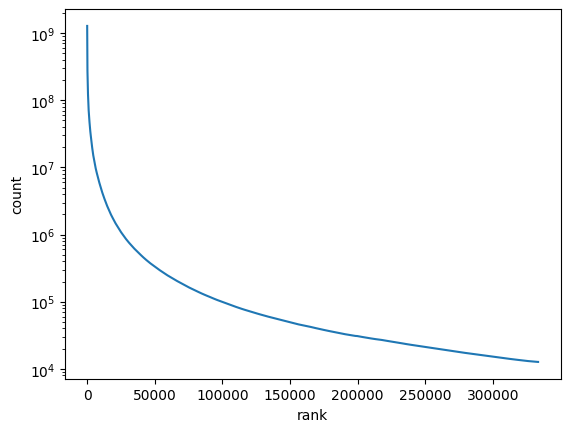

In [63]:
g = sn.lineplot(df[::-100], x='rank', y='count')
g.set(yscale='log')

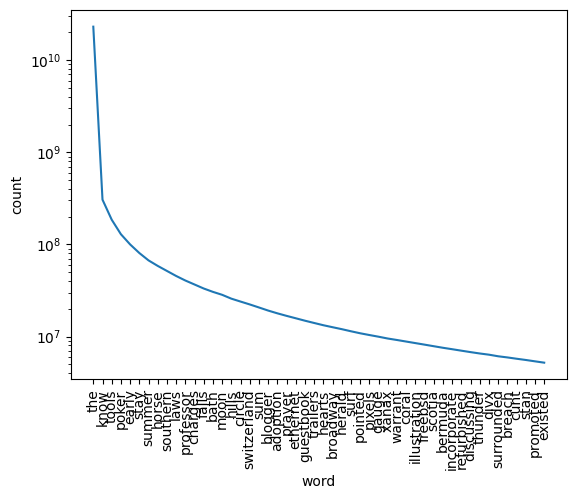

In [102]:
g = sn.lineplot(df[:10000][::200], x='word', y='count')
g.set(yscale='log')
g.tick_params(axis='x', rotation=90)

## Who wins - Insights from simple word counts

In [52]:
def who_wins(w1, w2):
    count_w1 = df[ df['word']==w1 ].iloc[0]["count"]
    count_w2 = df[ df['word']==w2 ].iloc[0]["count"]
    rank_w1 = df[ df['word']==w1 ].iloc[0]["rank"]
    rank_w2 = df[ df['word']==w2 ].iloc[0]["rank"]

    if count_w1 < count_w2:
        w1, w2 = w2, w1
        count_w1, count_w2 = count_w2, count_w1
        rank_w1, rank_w2 = rank_w2, rank_w1

    print(f'"{w1}" rank#{rank_w1} (count={count_w1}) wins over "{w2}" rank#{rank_w2} (count={count_w2})')

In [53]:
who_wins("dad", "mom")

"mom" rank#2678 (count=29736214) wins over "dad" rank#4523 (count=15136055)


In [54]:
who_wins("cat", "mom")

"cat" rank#1759 (count=46839855) wins over "mom" rank#2678 (count=29736214)


In [55]:
who_wins("money", "happy")

"money" rank#390 (count=190205072) wins over "happy" rank#1279 (count=63471922)


In [56]:
who_wins("money", "happiness")

"money" rank#390 (count=190205072) wins over "happiness" rank#7321 (count=7976747)


In [57]:
who_wins("money", "love")

"love" rank#369 (count=201063526) wins over "money" rank#390 (count=190205072)


In [58]:
who_wins("money", "education")

"education" rank#241 (count=266738068) wins over "money" rank#390 (count=190205072)
